# Detector Gain

You could calculate the mean of each flat image manually using IRAF. Alternatively, you could calculate the means for all of the images automatically using Python.

In [26]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
# glob serves some of the same functions as ls in the terminal
import glob

## FITS Headers
The headers of the FITS files contain the exposure times of the flat images. Now we use `fits.open` instead of `fits.getdata`. HDU stands for Header/Data Unit.

In [30]:
hdu = fits.open('data/480_2018_.Flat.180S0X1.Sky.51.fits')
header = hdu[0].header
print(header['exptime'])

180.0


## Calculating Mean Counts
We can find all of the flat images, assuming they all have 'Flat' in the name.
#### You will need to change the path to the directory containing your data.

In [31]:
# This is equivalent to $ ls Flat*.fits
flat_list = glob.glob('data/480_2018_.Flat.*.fits')
flat_list

['data/480_2018_.Flat.162S0X1.Sky.52.fits',
 'data/480_2018_.Flat.0S0X1.Sky.68.fits',
 'data/480_2018_.Flat.9S0X1.Sky.62.fits',
 'data/480_2018_.Flat.180S0X1.Sky.51.fits',
 'data/480_2018_.Flat.120S0X1.Sky.56.fits',
 'data/480_2018_.Flat.1S0X1.Sky.66.fits',
 'data/480_2018_.Flat.36S0X1.Sky.59.fits',
 'data/480_2018_.Flat.18S0X1.Sky.61.fits',
 'data/480_2018_.Flat.54S0X1.Sky.58.fits',
 'data/480_2018_.Flat.90S0X1.Sky.69.fits',
 'data/480_2018_.Flat.4S0X1.Sky.63.fits',
 'data/480_2018_.Flat.0S0X1.Sky.67.fits',
 'data/480_2018_.Flat.144S0X1.Sky.53.fits',
 'data/480_2018_.Flat.126S0X1.Sky.54.fits',
 'data/480_2018_.Flat.72S0X1.Sky.57.fits']

Now we can loop through each flat image, and keep track of the exposure time and mean counts

In [32]:
# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open(filename)
    print(filename)
    
    exptime = hdu[0].header['exptime']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

data/480_2018_.Flat.162S0X1.Sky.52.fits
Exposure time 162.0 sec
Mean counts: 53797.94

data/480_2018_.Flat.0S0X1.Sky.68.fits
Exposure time 0.281 sec
Mean counts: 1099.78

data/480_2018_.Flat.9S0X1.Sky.62.fits
Exposure time 9.0 sec
Mean counts: 3591.21

data/480_2018_.Flat.180S0X1.Sky.51.fits
Exposure time 180.0 sec
Mean counts: 55499.41

data/480_2018_.Flat.120S0X1.Sky.56.fits
Exposure time 120.0 sec
Mean counts: 38706.95

data/480_2018_.Flat.1S0X1.Sky.66.fits
Exposure time 1.125 sec
Mean counts: 1345.15

data/480_2018_.Flat.36S0X1.Sky.59.fits
Exposure time 36.0 sec
Mean counts: 12045.93

data/480_2018_.Flat.18S0X1.Sky.61.fits
Exposure time 18.0 sec
Mean counts: 6597.05

data/480_2018_.Flat.54S0X1.Sky.58.fits
Exposure time 54.0 sec
Mean counts: 18446.11

data/480_2018_.Flat.90S0X1.Sky.69.fits
Exposure time 90.0 sec
Mean counts: 28085.63

data/480_2018_.Flat.4S0X1.Sky.63.fits
Exposure time 4.0 sec
Mean counts: 2180.11

data/480_2018_.Flat.0S0X1.Sky.67.fits
Exposure time 0.563 sec
Mean c

## Plot mean counts versus exposure time


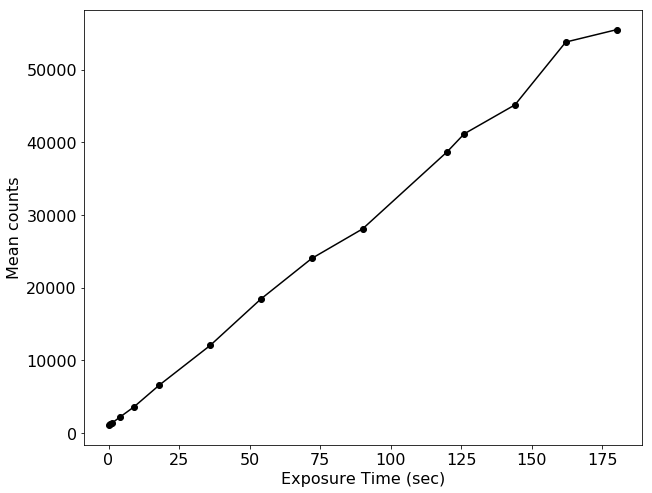

In [33]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.plot(exp_times, means, '-ko')
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Mean counts')
plt.show()